In [1]:
import numpy as np
import pandas as pd
import plotnine as ptn
from plotnine import *
import pprint

import seaborn as sns

In [2]:
from sklearn import datasets

wine = datasets.load_wine() #Cargando el dataset de vino

print(wine.feature_names) #Analizando las variables que tiene
pd_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

pd_wine.head(2)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [3]:
#Escalando los datos
from sklearn.preprocessing import StandardScaler

wine_scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
wine_scaled_features = wine_scaler.fit_transform(pd_wine) #Transformamos los datos
wine_scaled_features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [4]:
#Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA

# Creamos objeto PCA y entrenamos
pca = PCA(n_components=2)
pca.fit(wine_scaled_features)

# Aplicamos PCA a los features escalados (el mismo input del K-means que estamos interpretando)
pca_data = pca.transform(wine_scaled_features)
pca_data = pd.DataFrame(pca_data,columns=["PC1","PC2"])
pca_data

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


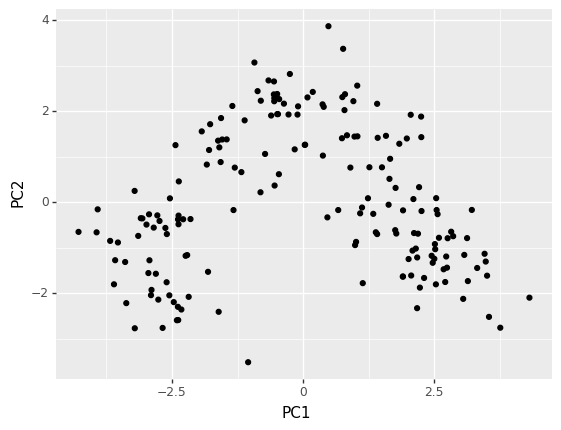

<ggplot: (8744161619185)>

In [5]:
(
    ggplot(pca_data)
        +aes(x="PC1",y="PC2")
        +geom_point()
)

In [6]:
#Analizando los componentes
principal_components_data = pd.DataFrame(pca.components_.transpose(),columns=["PC1","PC2"])
principal_components_data['varNames'] = wine.feature_names
principal_components_data

,PC1,PC2,varNames
0,0.144329,-0.483652,alcohol
1,-0.245188,-0.224931,malic_acid
2,-0.002051,-0.316069,ash
3,-0.239320,0.010591,alcalinity_of_ash
4,0.141992,-0.299634,magnesium
5,0.394661,-0.065040,total_phenols
6,0.422934,0.003360,flavanoids
7,-0.298533,-0.028779,nonflavanoid_phenols
8,0.313429,-0.039302,proanthocyanins
9,-0.088617,-0.529996,color_intensity


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


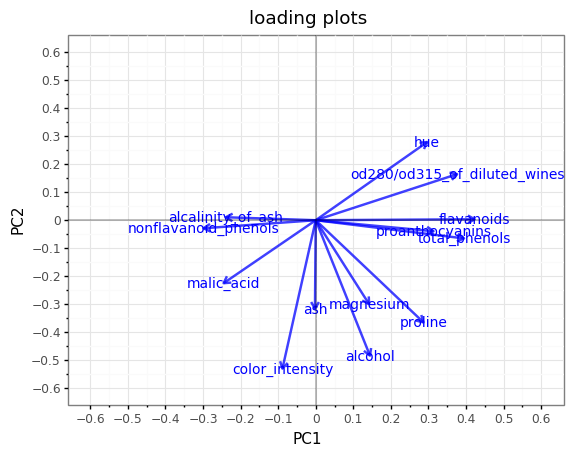

<ggplot: (8744157926173)>

In [7]:
(
    ggplot(principal_components_data)
      +theme_bw()
      +labs(title="loading plots")
      +geom_text(aes(x="PC1", y="PC2", label="varNames"), size = 10, color="blue")
      +geom_segment(aes(x=0, y=0, xend="PC1", yend="PC2"), arrow=arrow(length=0.1),size=1, alpha=0.75, color="blue")
      +scale_x_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])
      +scale_y_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])
      +geom_hline(yintercept = 0, size=.2)
      +geom_vline(xintercept = 0, size=.2)
      +coord_cartesian([-0.6,0.6],[-0.6,0.6])
)

In [11]:
pca2 = PCA()
pca2.fit(wine_scaled_features)
pca2.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [12]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

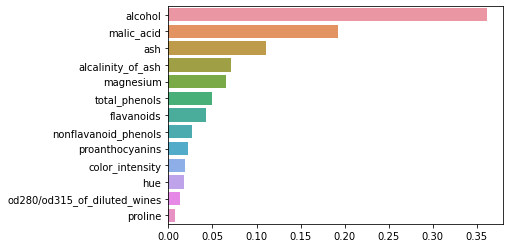

In [13]:
sns.barplot(x=pca2.explained_variance_ratio_, y=wine.feature_names)
